In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('train_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Y    422
N    192
Name: Loan_Status, dtype: int64


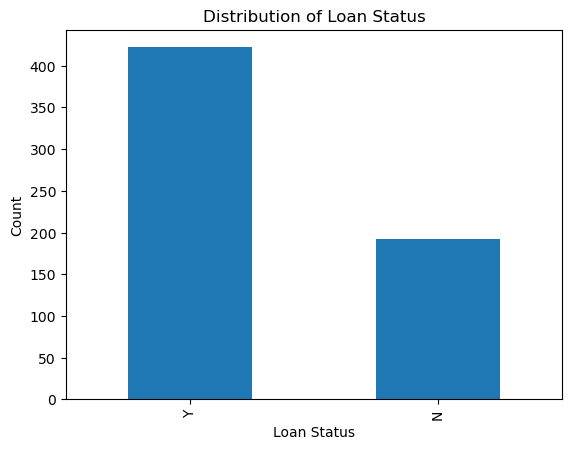

In [3]:
# Count the occurrences of each class in the target variable
loan_status_counts = df['Loan_Status'].value_counts()
print(loan_status_counts)

# Plot the distribution of the target variable
import matplotlib.pyplot as plt
loan_status_counts.plot(kind='bar')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


In [4]:
df.drop("Loan_ID", axis=1, inplace=True)

In [5]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [9]:
numerical = df.select_dtypes(include=['int','float64'])
categorical = df.select_dtypes(include=['object'])

In [10]:
categorical

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


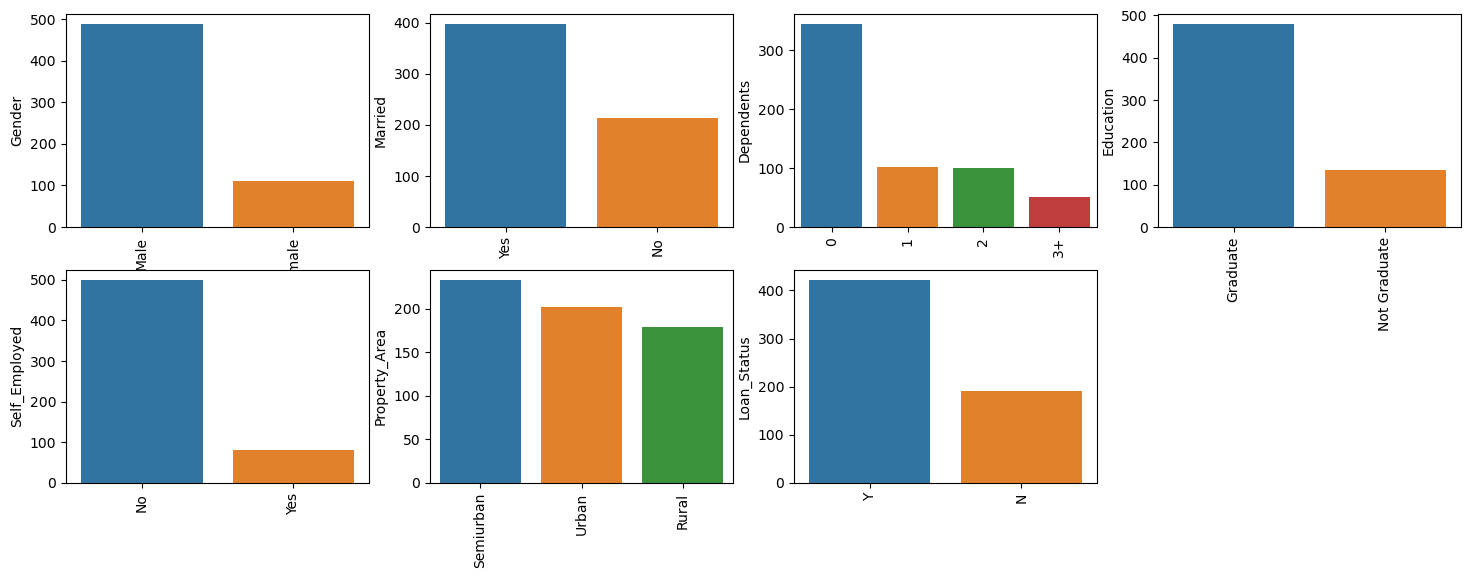

In [11]:
obj = (df.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1

for col in object_cols: 
    y = df[col].value_counts() 
    plt.subplot(11,4,index) 
    plt.xticks(rotation=90) 
    sns.barplot(x=list(y.index), y=y) 
    index +=1

In [12]:
from sklearn import preprocessing 

label_encoder = preprocessing.LabelEncoder() 
obj = (df.dtypes == 'object') 
for col in list(obj[obj].index): 
    df[col] = label_encoder.fit_transform(df[col])

In [13]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [14]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)

imputed_data = imputer.fit_transform(df)

imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

print(imputed_df)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0       1.0      0.0         0.0        0.0            0.0           5849.0   
1       1.0      1.0         1.0        0.0            0.0           4583.0   
2       1.0      1.0         0.0        0.0            1.0           3000.0   
3       1.0      1.0         0.0        1.0            0.0           2583.0   
4       1.0      0.0         0.0        0.0            0.0           6000.0   
..      ...      ...         ...        ...            ...              ...   
609     0.0      0.0         0.0        0.0            0.0           2900.0   
610     1.0      1.0         3.0        0.0            0.0           4106.0   
611     1.0      1.0         1.0        0.0            0.0           8072.0   
612     1.0      1.0         2.0        0.0            0.0           7583.0   
613     0.0      0.0         0.0        0.0            1.0           4583.0   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [16]:
imputed_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

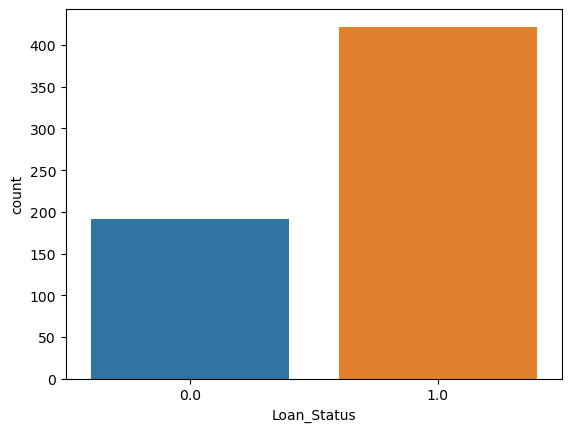

In [22]:
sns.countplot(data=imputed_df,x='Loan_Status')
plt.show()

In [23]:
X = imputed_df.drop(columns='Loan_Status', axis=1)
y = imputed_df['Loan_Status']

In [19]:
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train, y_train)

In [20]:
print(X_resampled_smote.shape,'\n',y_resampled_smote.shape)

(684, 11) 
 (684,)


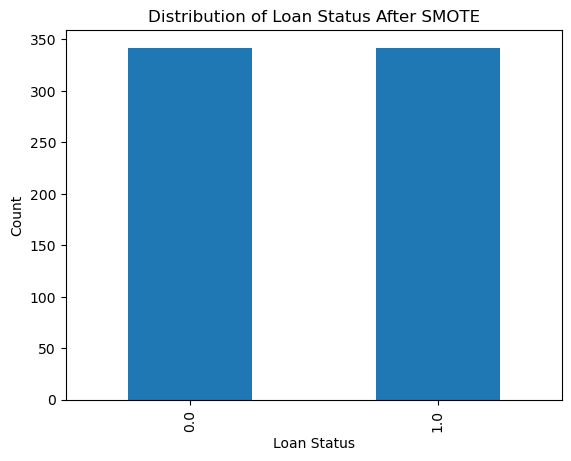

In [25]:
y_resampled_smote = pd.Series(y_resampled_smote)
y_resampled_smote.value_counts().plot(kind='bar')
plt.title('Distribution of Loan Status After SMOTE')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

In [26]:

# Step 2: Train and Evaluate the Model on the Original Dataset
dtc_original = DecisionTreeClassifier(criterion='gini', random_state=0)
dtc_original.fit(X_train, y_train)
y_pred_original = dtc_original.predict(X_test)
print("Classification Report for Original Dataset:")
print(classification_report(y_test, y_pred_original))

Classification Report for Original Dataset:
              precision    recall  f1-score   support

         0.0       0.53      0.58      0.56        43
         1.0       0.76      0.72      0.74        80

    accuracy                           0.67       123
   macro avg       0.65      0.65      0.65       123
weighted avg       0.68      0.67      0.68       123



In [28]:
print(accuracy_score(y_pred_original, y_test))

0.6747967479674797


In [51]:
# Step 3: Train and Evaluate the Model on the SMOTE Resampled Dataset
dtc_smote = DecisionTreeClassifier(criterion='gini', random_state=0)
dtc_smote.fit(X_resampled_smote, y_resampled_smote)
y_pred_smote = dtc_smote.predict(X_test)
print("Classification Report for SMOTE Resampled Dataset:")
print(classification_report(y_test, y_pred_smote))

Classification Report for SMOTE Resampled Dataset:
              precision    recall  f1-score   support

         0.0       0.62      0.56      0.59        43
         1.0       0.77      0.81      0.79        80

    accuracy                           0.72       123
   macro avg       0.69      0.69      0.69       123
weighted avg       0.72      0.72      0.72       123



In [29]:
print(accuracy_score(y_pred_smote, y_test))

0.7235772357723578


In [47]:
#dtc_gini=DecisionTreeClassifier(criterion='gini',random_state=0)
#dtc_gini.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [48]:
#y_pred_gini = dtc_gini.predict(X_test)

In [29]:
#print(accuracy_score(y_pred_gini,y_test))

0.6747967479674797


In [36]:
dtc_original = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
dtc_original.fit(X_train, y_train)
y_pred_original = dtc_original.predict(X_test)
print("Classification Report for Original Dataset:")
print(classification_report(y_pred_original, y_test))

Classification Report for Original Dataset:
              precision    recall  f1-score   support

         0.0       0.42      0.78      0.55        23
         1.0       0.94      0.75      0.83       100

    accuracy                           0.76       123
   macro avg       0.68      0.77      0.69       123
weighted avg       0.84      0.76      0.78       123



In [37]:
print(accuracy_score(y_pred_original, y_test))

0.7560975609756098


In [40]:
dtc_smote1 = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
dtc_smote1.fit(X_resampled_smote, y_resampled_smote)
y_pred_smote1 = dtc_smote1.predict(X_test)
print("Classification Report for SMOTE Resampled Dataset:")
print(classification_report(y_test, y_pred_smote1))

Classification Report for SMOTE Resampled Dataset:
              precision    recall  f1-score   support

         0.0       0.82      0.42      0.55        43
         1.0       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123



In [41]:
print(accuracy_score(y_pred_smote1, y_test))

0.7642276422764228


In [32]:
#dtc_entropy=DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)
#dtc_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [33]:
#y_pred_entropy = dtc_entropy.predict(X_test)

In [34]:
#print(accuracy_score(y_pred_entropy,y_test))

0.7560975609756098


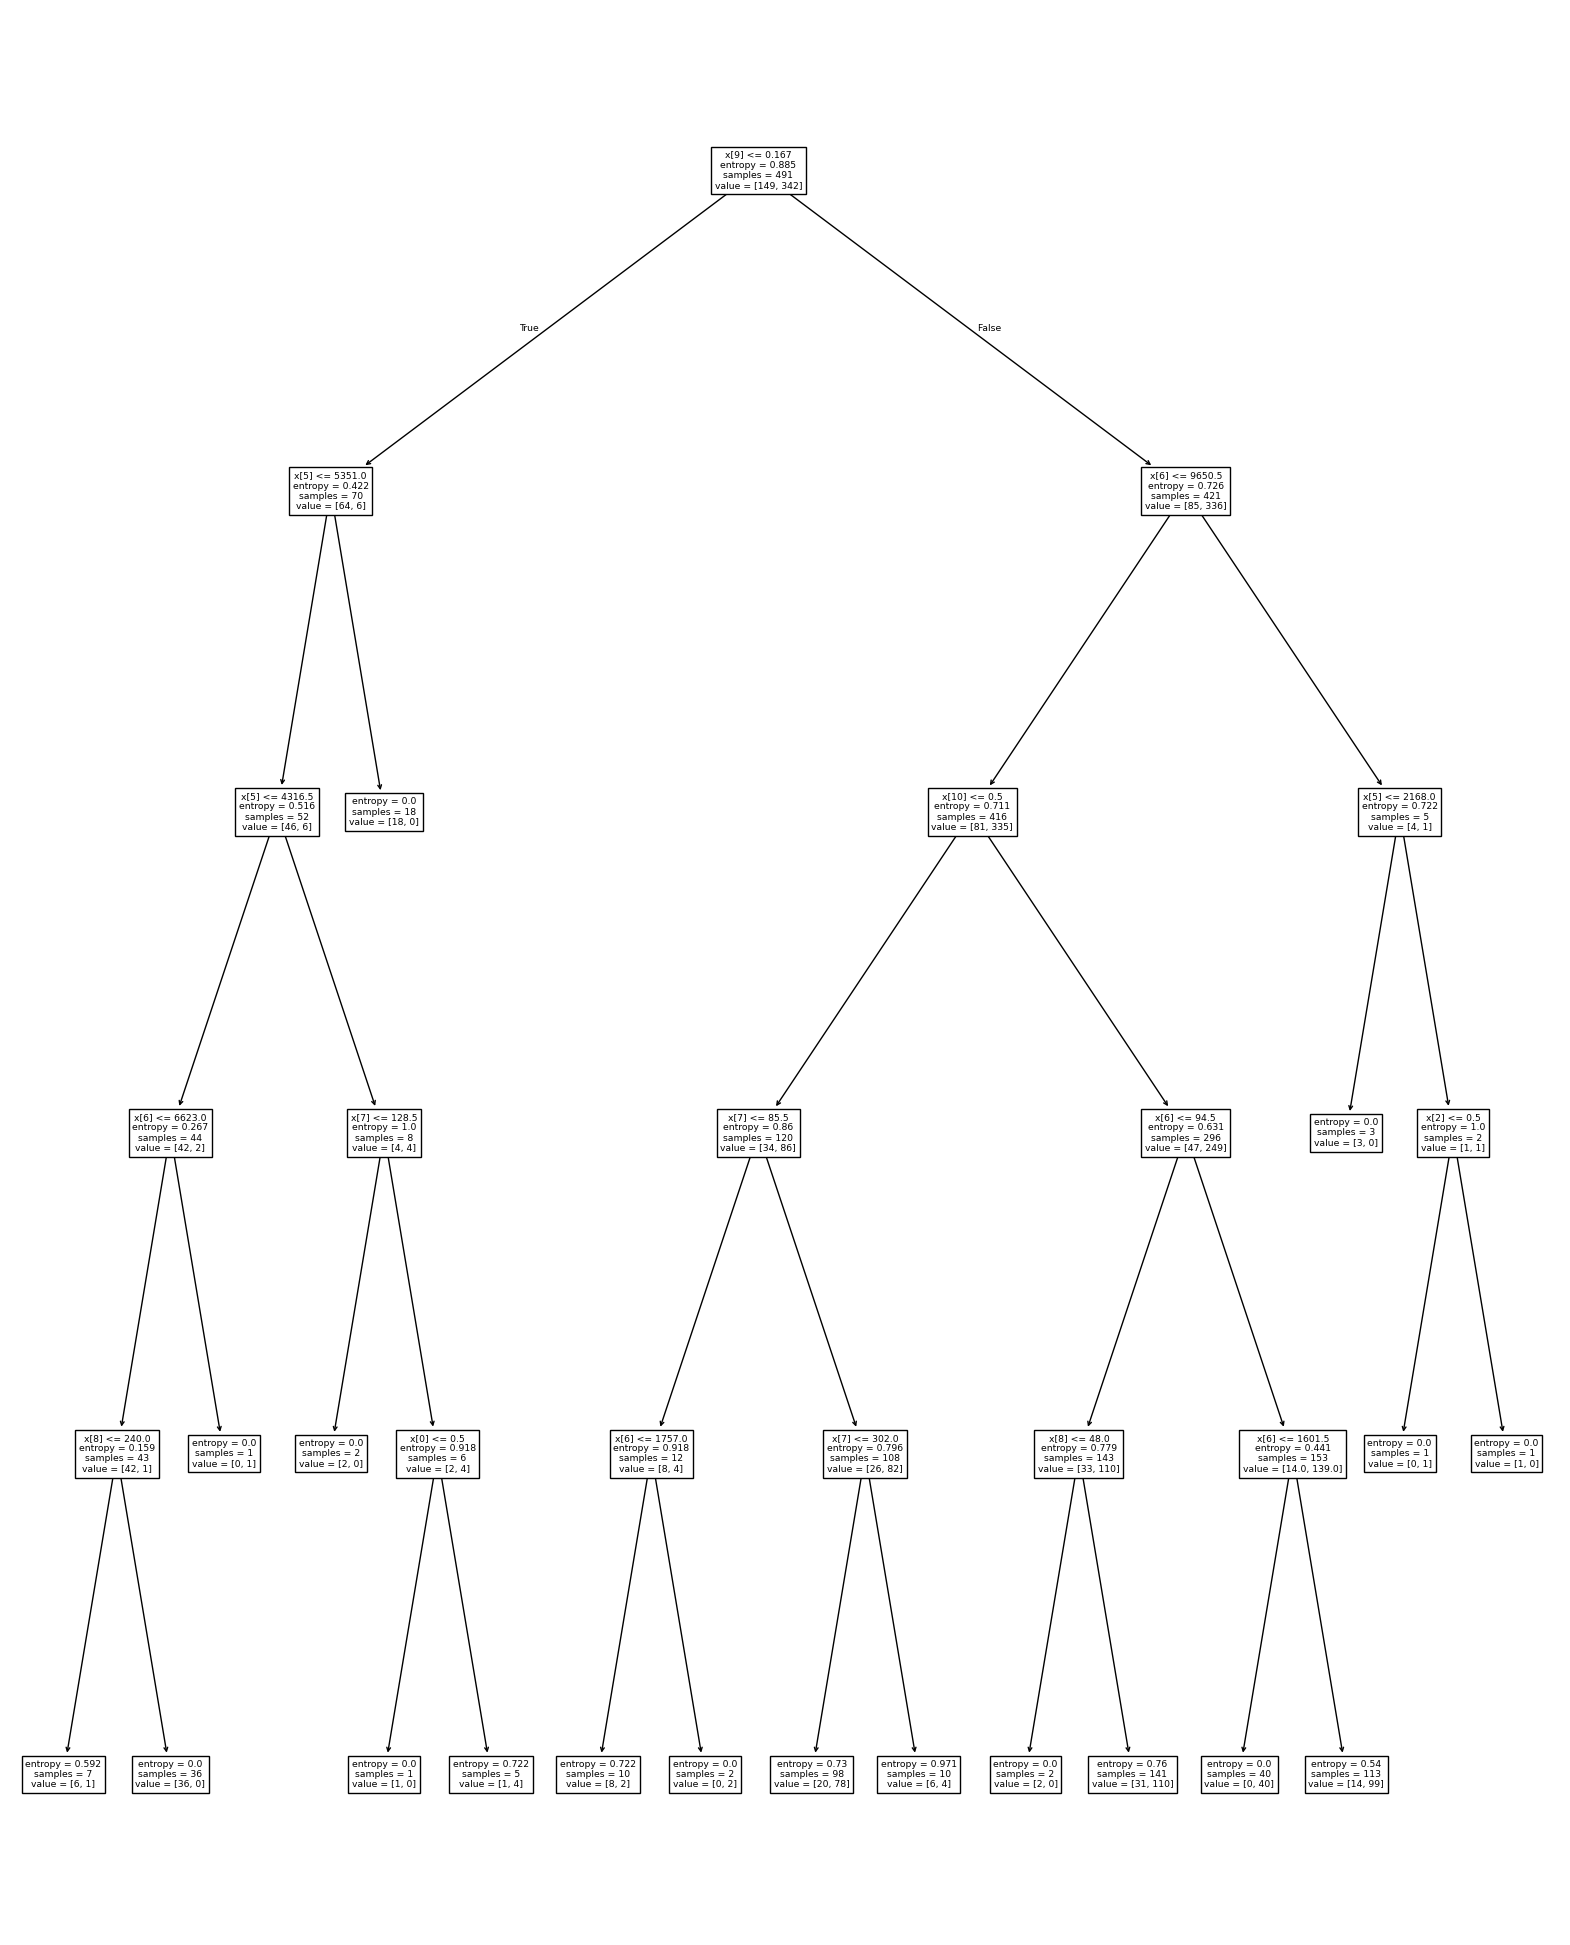

In [53]:
from sklearn import tree
plt.figure(figsize=(20,25))
tree.plot_tree(dtc_smote1.fit(X_train,y_train))
plt.show()

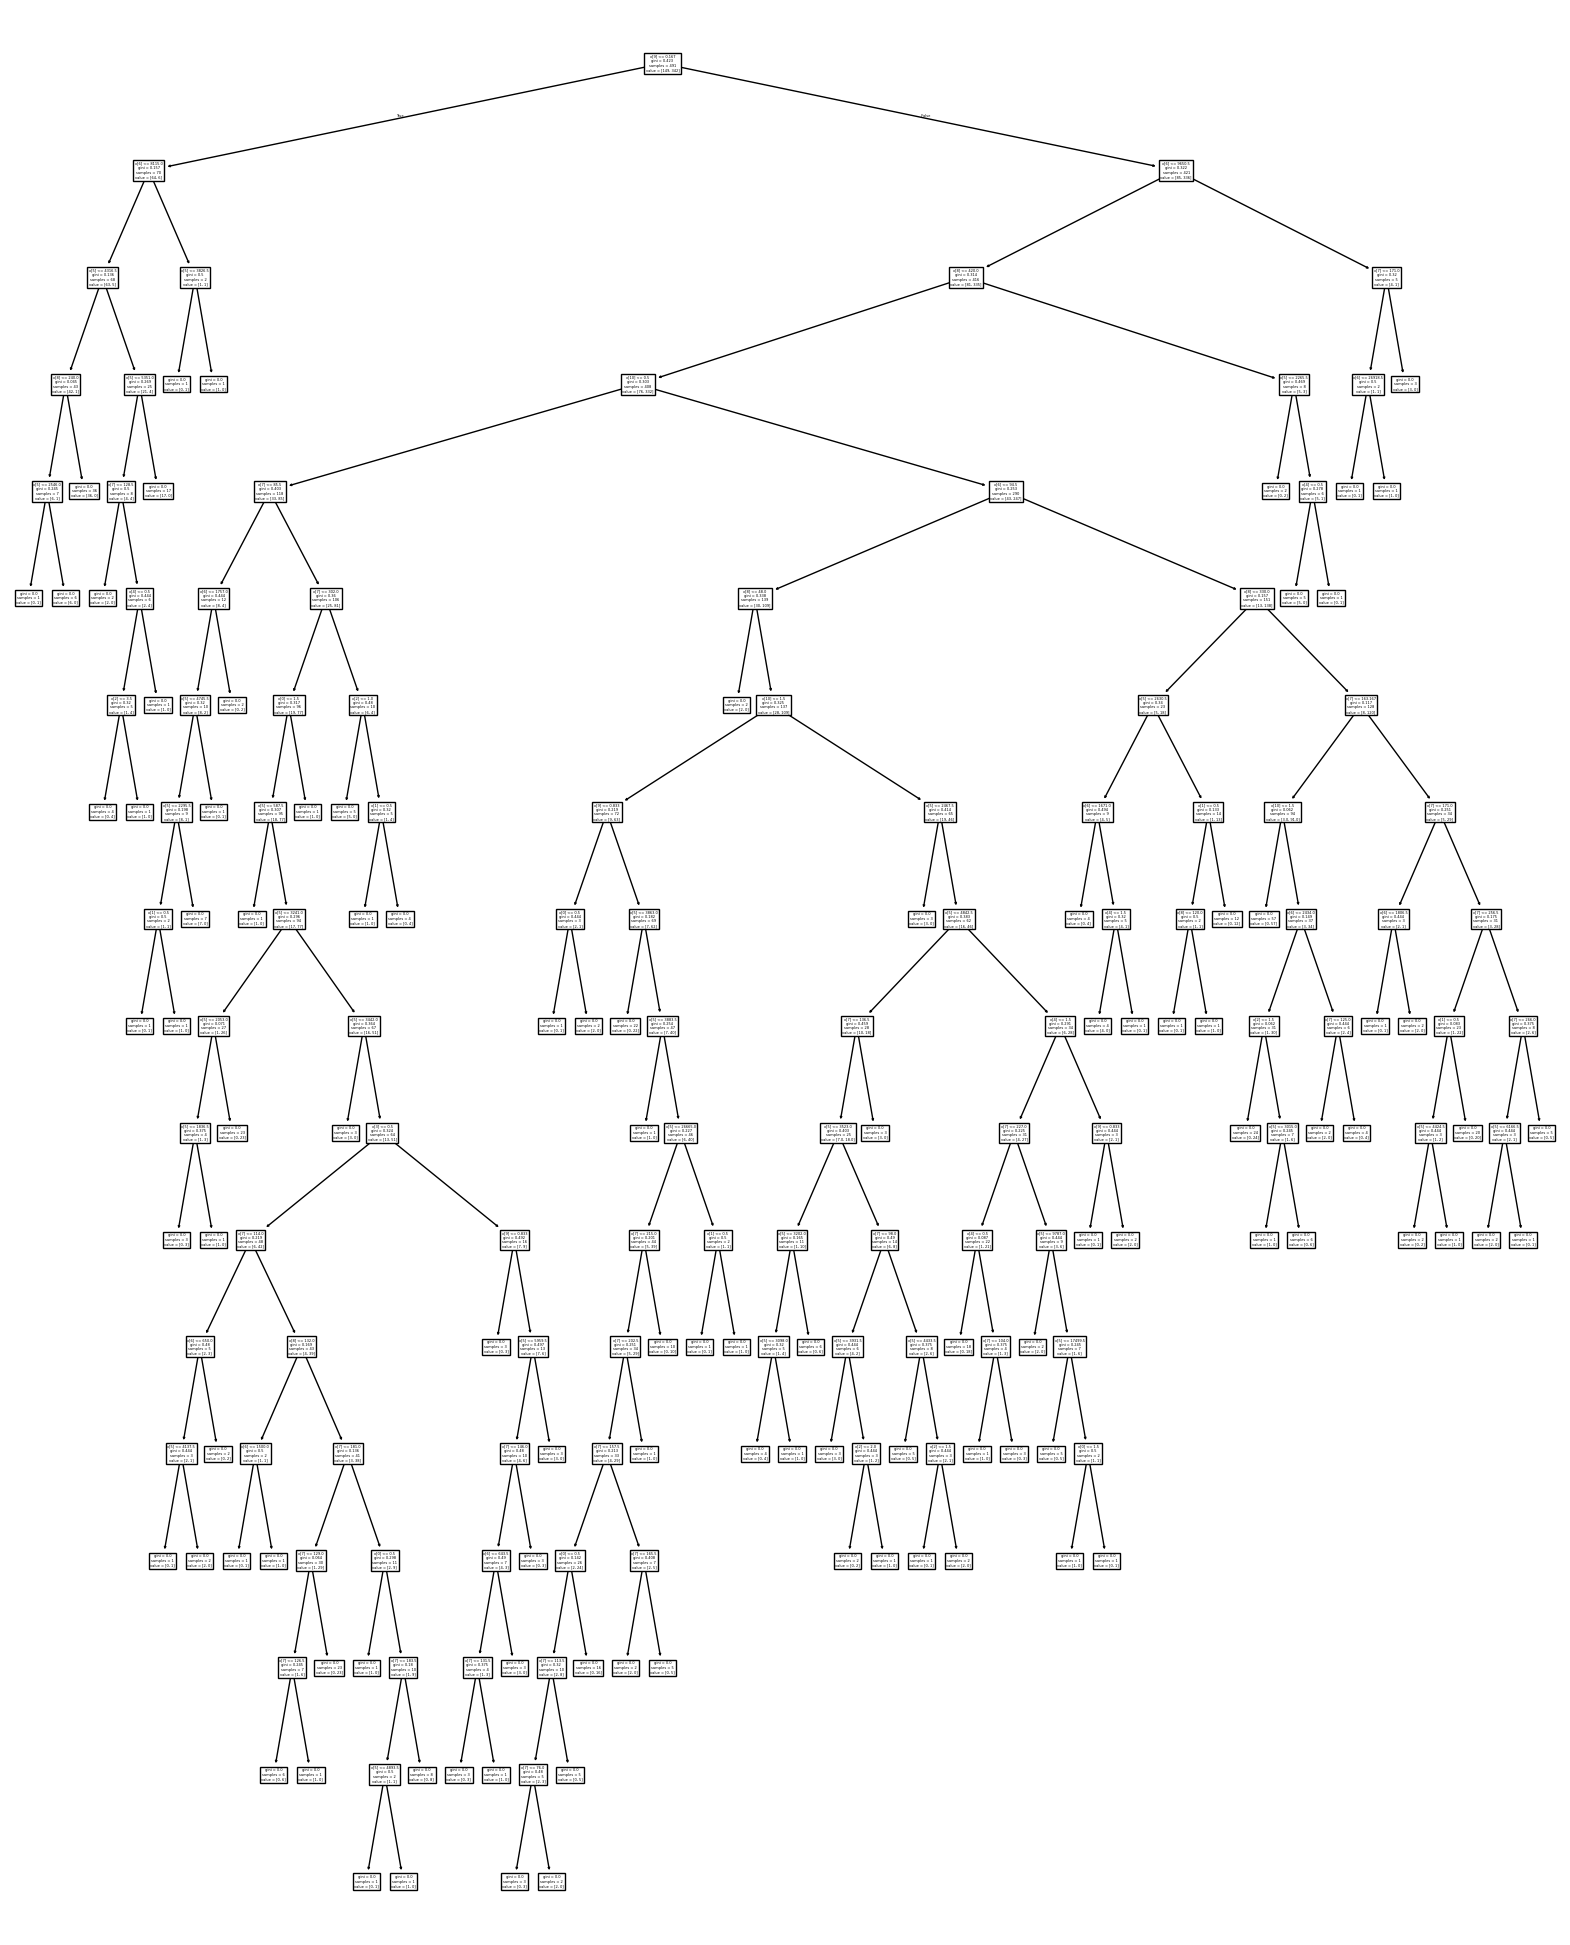

In [49]:
from sklearn import tree
plt.figure(figsize=(20,25))
tree.plot_tree(dtc_gini.fit(X_train,y_train))
plt.show()

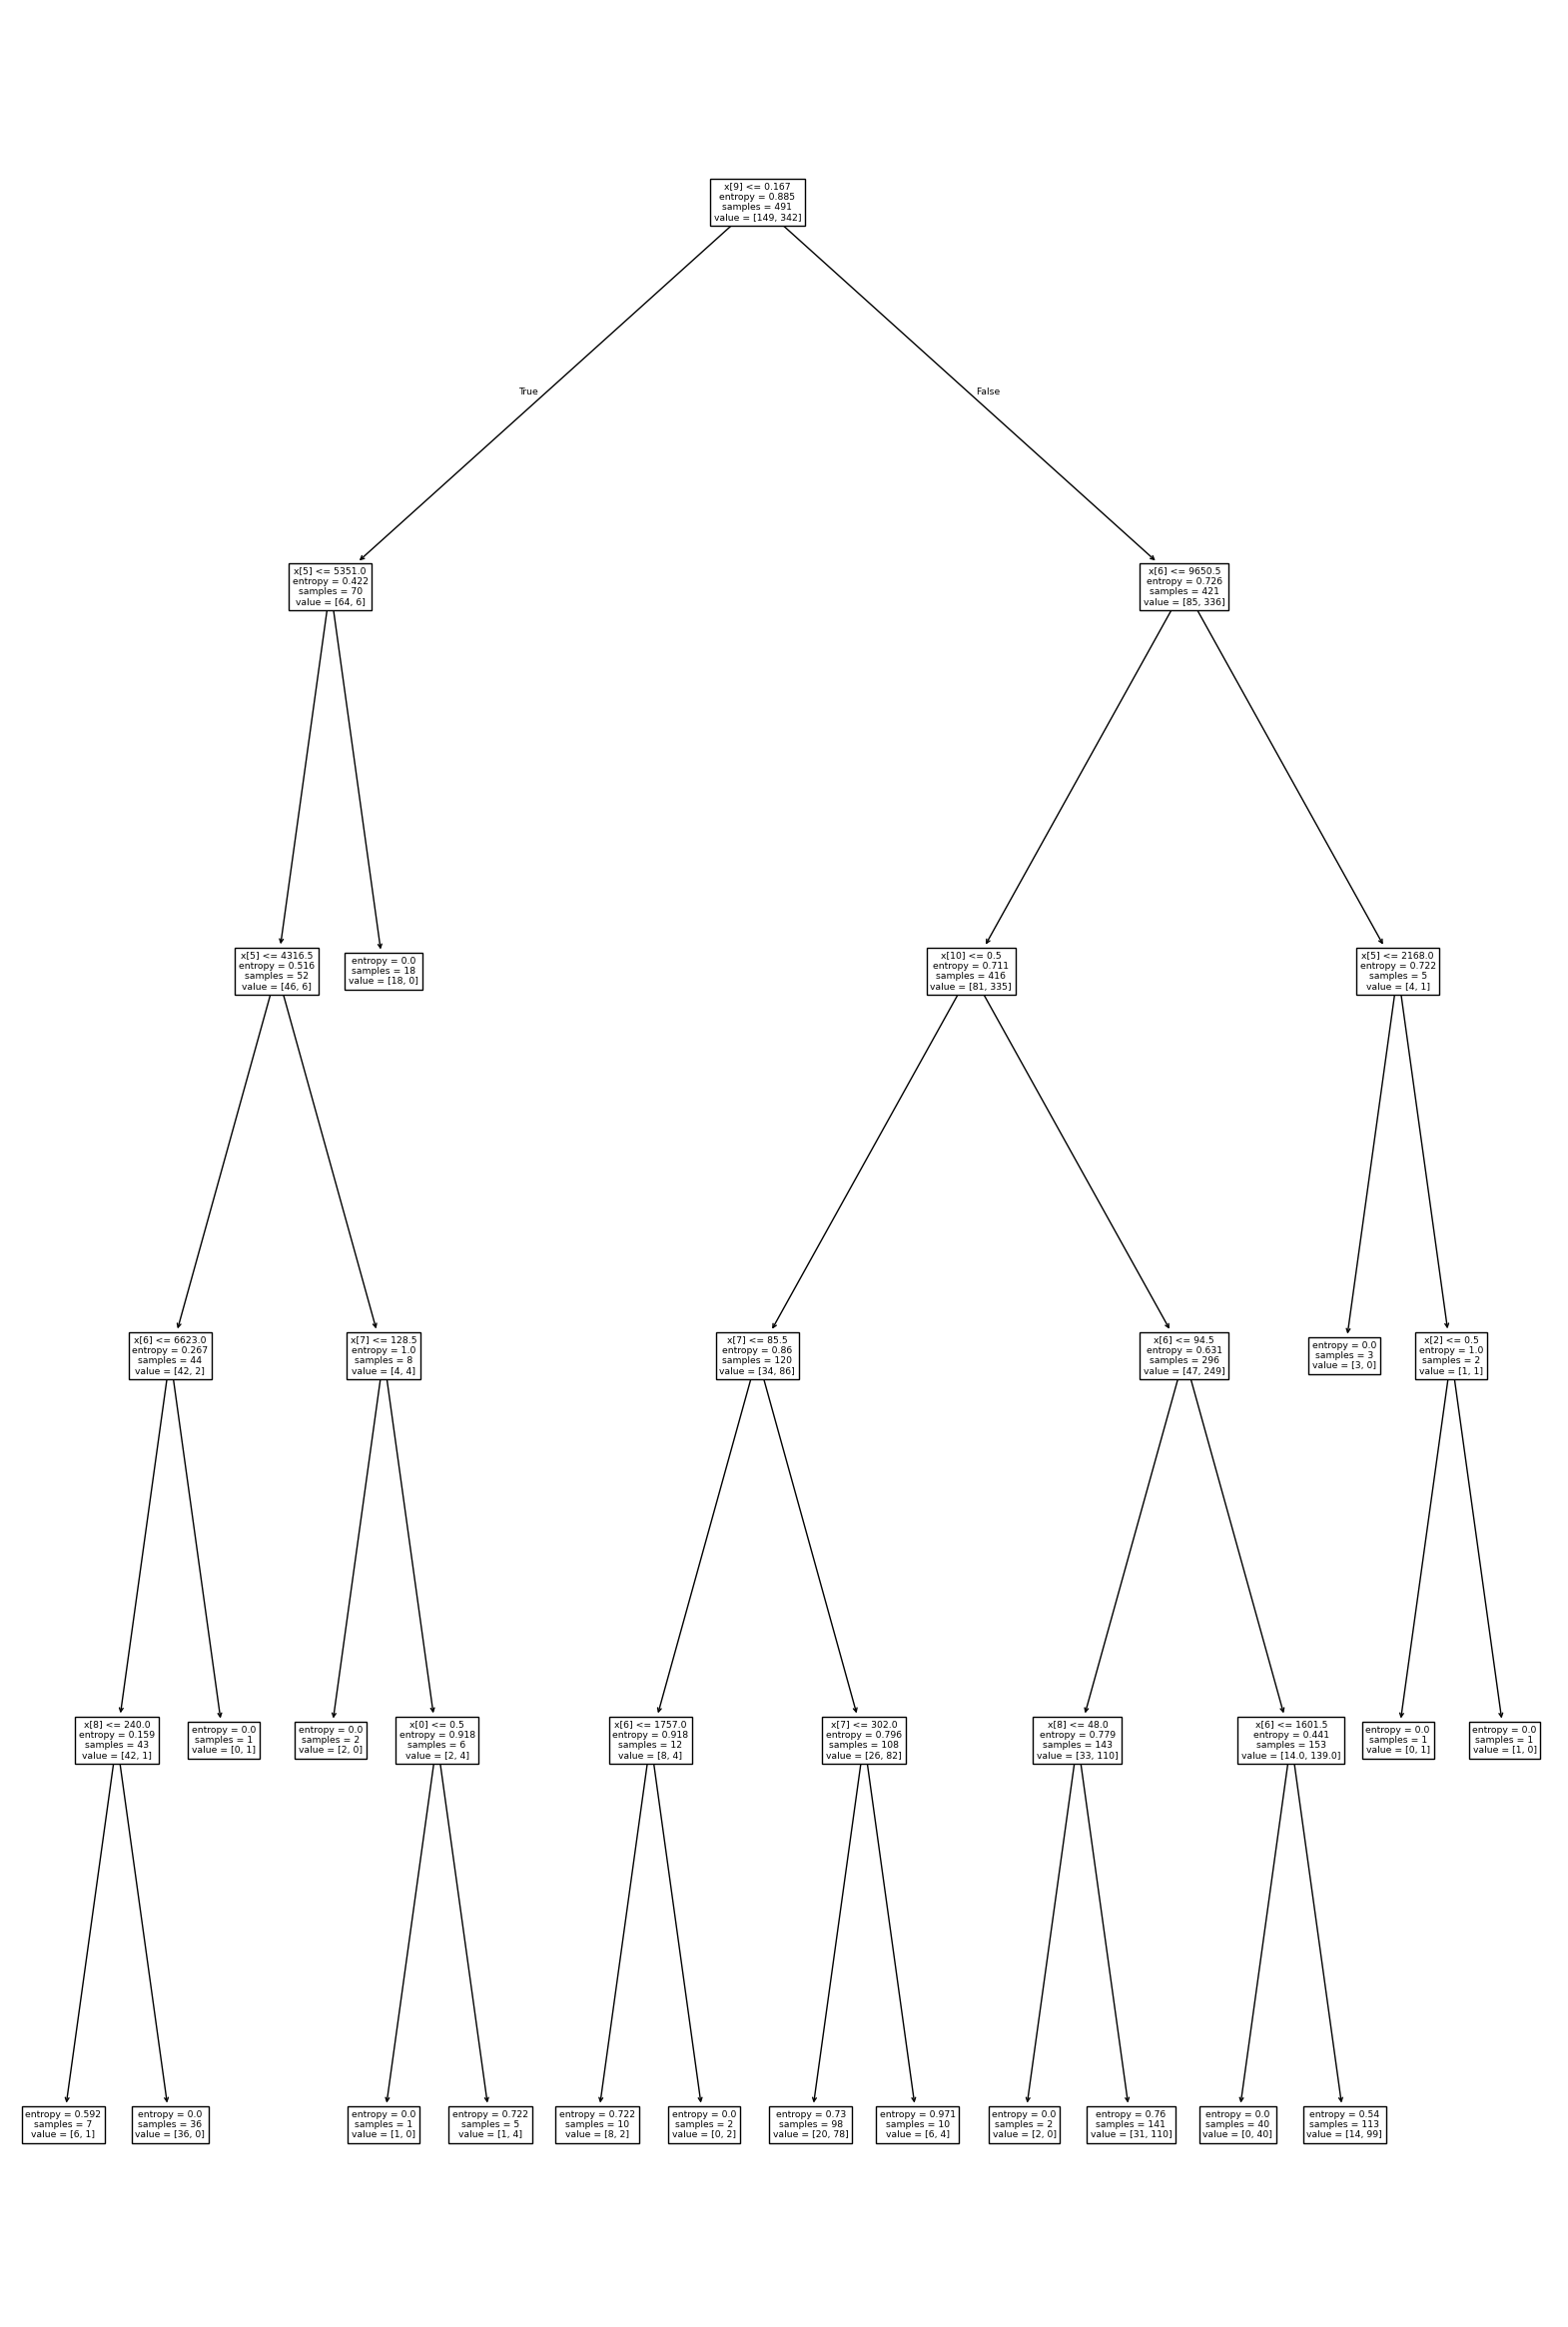

In [40]:
from sklearn import tree
plt.figure(figsize=(20,30))
tree.plot_tree(dtc_entropy.fit(X_train,y_train))
plt.show()